# Q. Here the problem state is we need to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. 
### In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [1]:
#importing necessary statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') 

In [2]:
# Reading dataset
micro = pd.read_csv('Data file.csv')
#pd.set_option('display.max_columns', None)
micro

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [4]:
micro.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [5]:
micro.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [6]:
micro.drop_duplicates(keep = 'first' )

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


### In over dataset their is no duplicate values.

In [7]:
micro.shape

(209593, 37)

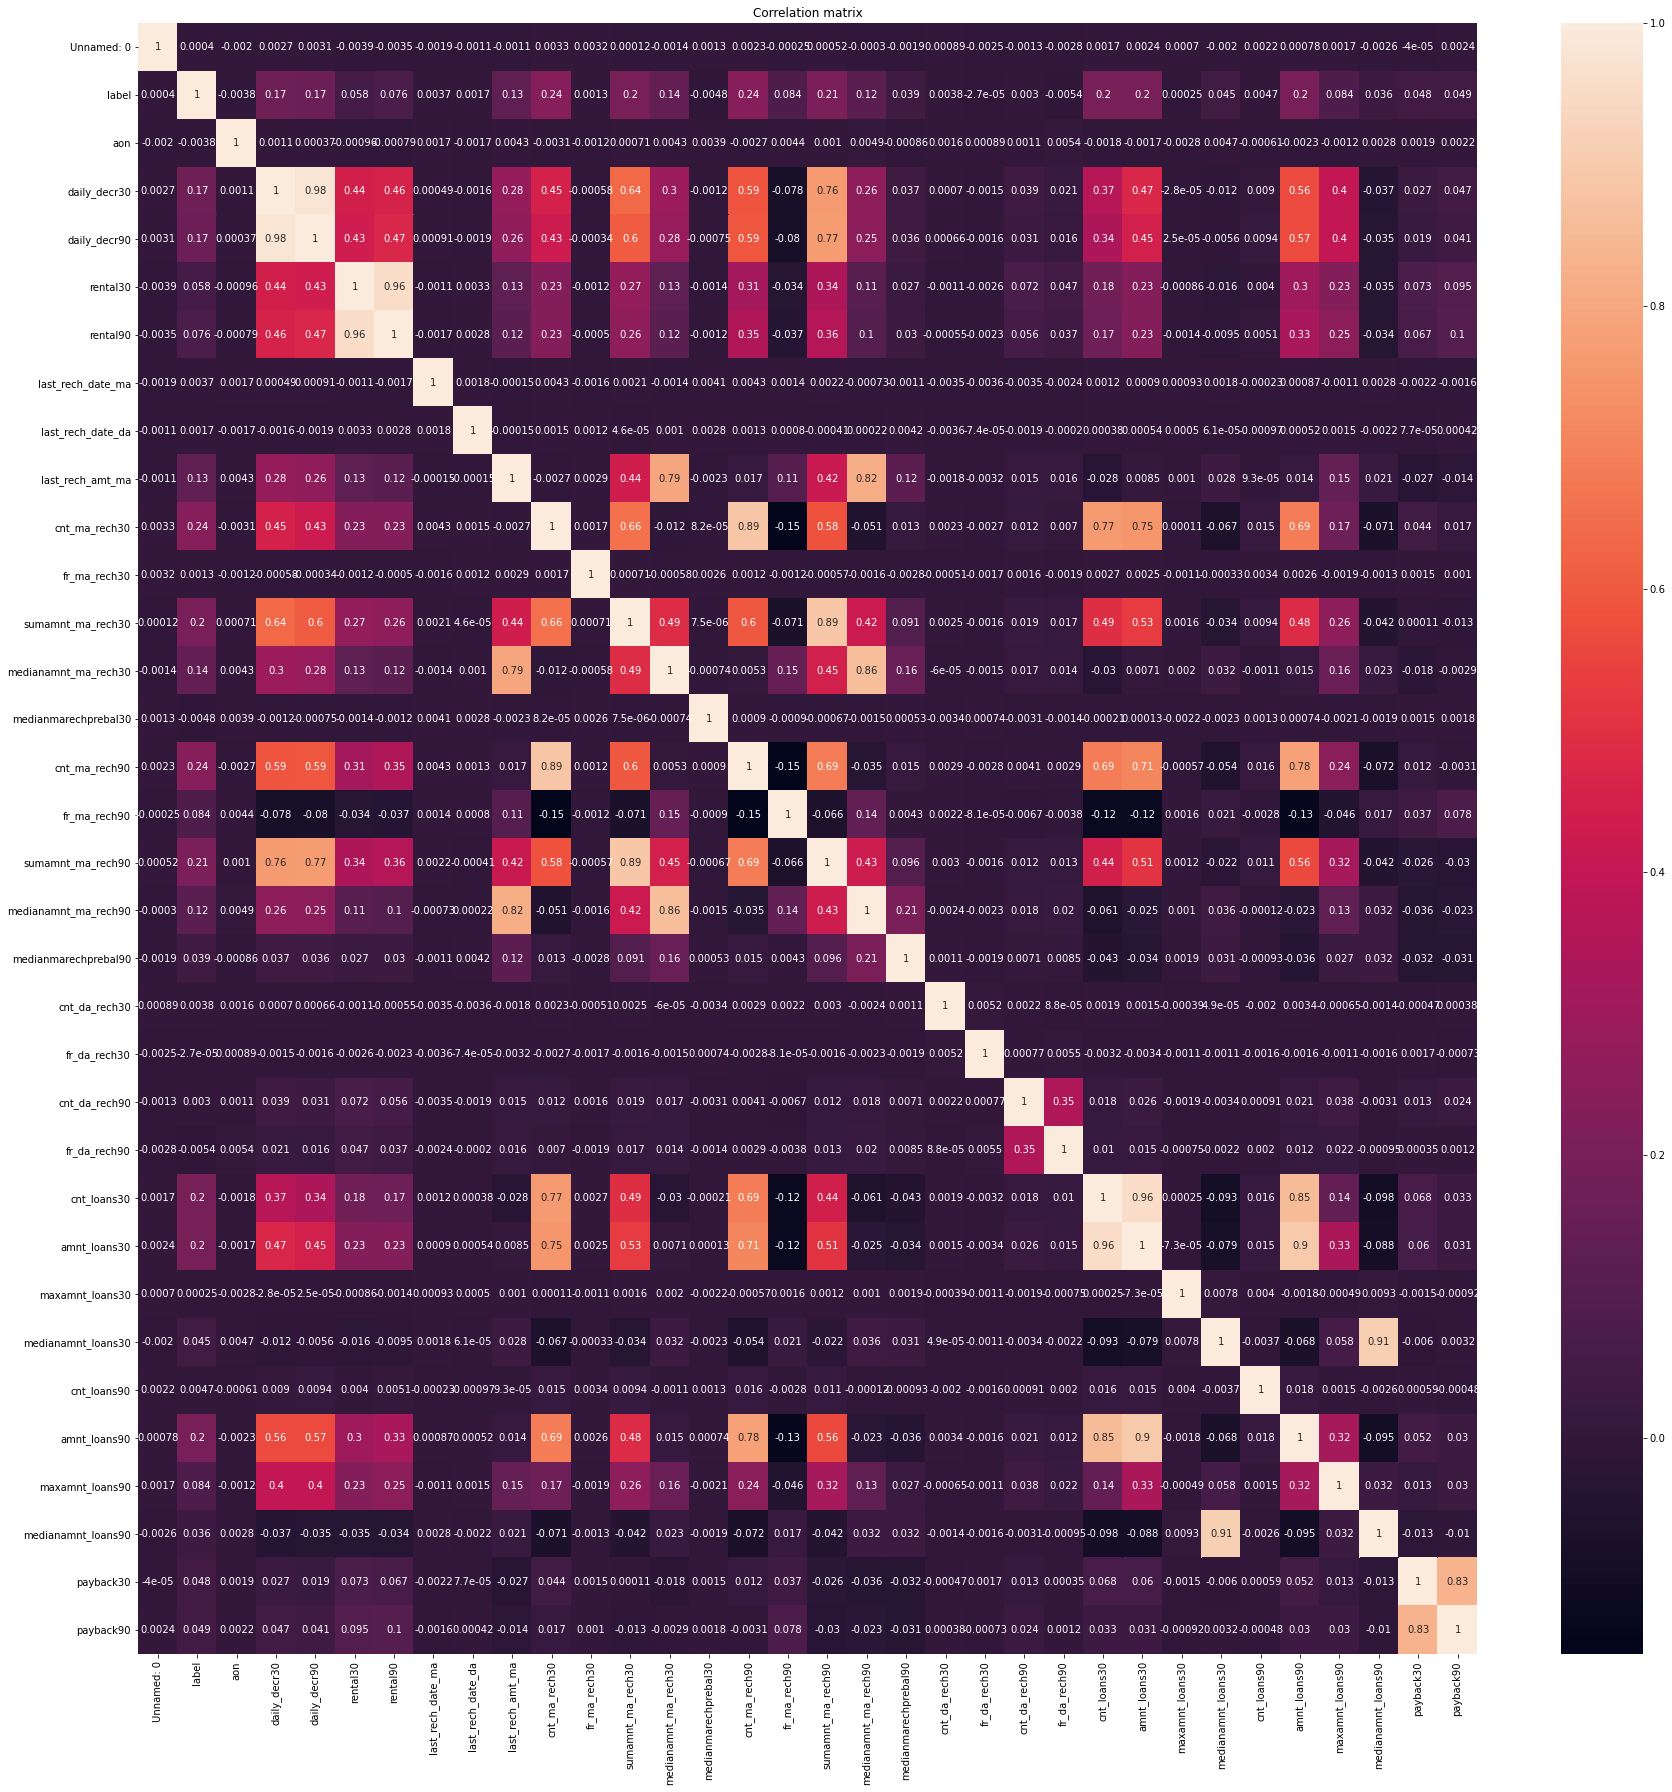

In [8]:
# Check for correlation between the variable.
plt.figure(figsize=(30,30))
sns.heatmap(micro.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

### from the correlation matric we can observe that lots of variable are internally correlated with each other. 'daily_decr30','daily_decr90','rental30','rental90' and 'payback 30','payback 90' and 'medianamnt_loan90','medianamnt_30 are highly positively related with each other.

In [9]:
micro.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## Visualization

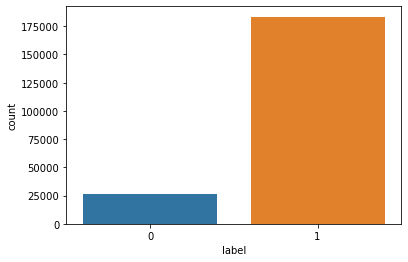

In [10]:
# label
sns.countplot(x='label',data=micro)
plt.show()


### From plotting we can observe that % of payed is high than not payed  

### Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, 
### Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [11]:
micro.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [12]:
#coverting 'pdate' object to date type.exacting neccesary data from it
micro['pdate'] = pd.to_datetime(micro['pdate'])
micro['day'] = micro['pdate'].dt.day
micro['month'] = micro['pdate'].dt.month
micro.drop(columns=['pdate'],axis=1,inplace=True)

In [13]:
micro.shape

(209593, 38)

In [14]:
micro.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6


In [15]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [16]:
micro.drop(columns=['msisdn'],axis=1,inplace=True)

In [17]:
y = micro['label']

In [18]:
numeric = ['aon','daily_decr30','daily_decr90','rental30','rental90',
                'last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30',
                'medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90',
                'medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','cnt_loans30',
                'amnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90',
                'medianamnt_loans90','payback30','payback90','last_rech_date_ma','last_rech_date_da']
catagorical =['pcircle']

In [19]:
micro[catagorical]

,pcircle
0,UPW
1,UPW
2,UPW
3,UPW
4,UPW
...,...
209588,UPW
209589,UPW
209590,UPW
209591,UPW


In [20]:
micro[numeric]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,last_rech_date_ma,last_rech_date_da
0,272.0,3055.050000,3065.150000,220.13,260.13,1539,2,21.0,3078.0,1539.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2.0,0.0
1,712.0,12122.000000,12124.750000,3691.26,3691.26,5787,1,0.0,5787.0,5787.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,20.0,0.0
2,535.0,1398.000000,1398.000000,900.13,900.13,1539,1,0.0,1539.0,1539.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,3.0,0.0
3,241.0,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,41.0,0.0
4,947.0,150.619333,150.619333,1098.90,1098.90,2309,7,2.0,20029.0,2309.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,4048,3,2.0,10404.0,3178.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,1.0,0.0
209589,1075.0,36.936000,36.936000,1728.36,1728.36,773,4,1.0,3092.0,773.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,4.0,0.0
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,1539,5,8.0,9334.0,1539.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,3.0,0.0
209591,1732.0,12488.228333,12574.370000,411.83,984.58,773,5,4.0,12154.0,773.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2.0,38.0


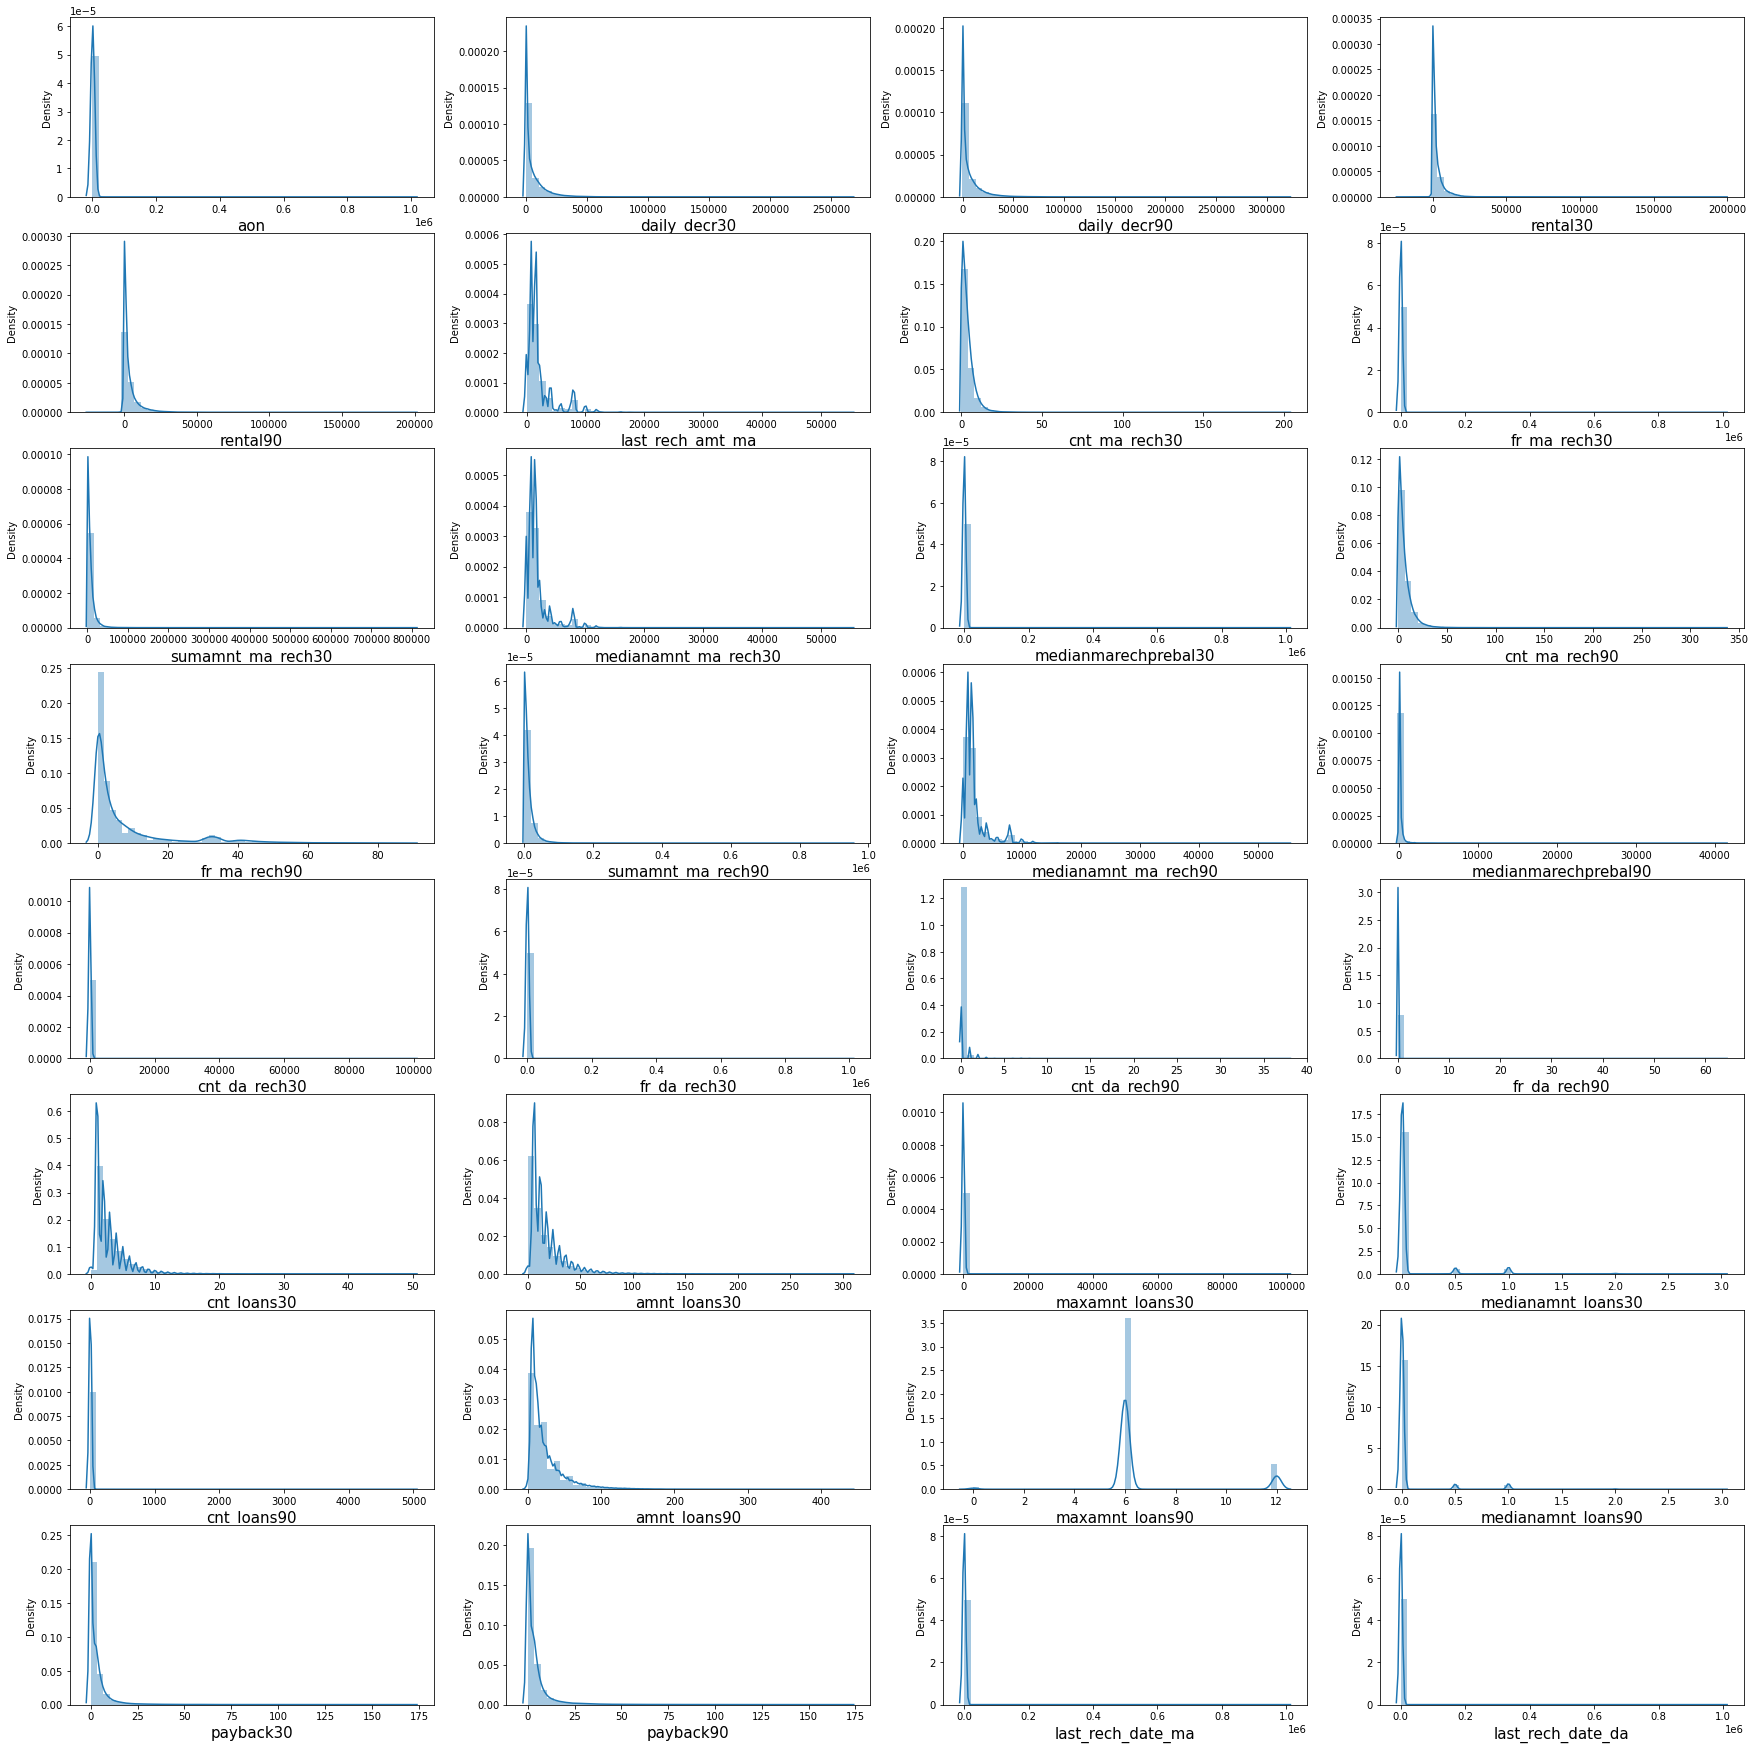

In [21]:
#visualizing data distribution
plt.figure(figsize=(30,35))
plotnumber= 1

for column in micro[numeric]:
    if plotnumber <=32:
        ax= plt.subplot(9,4,plotnumber)
        sns.distplot(micro[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

### From the plotting we can observe that over data set is right skewed. 

In [22]:
micro[numeric].skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90     

In [23]:
#removing skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
micro[numeric] = scaler.fit_transform(micro[numeric].values)
micro[numeric]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,last_rech_date_ma,last_rech_date_da
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,0.083417,-0.275617,1.603299,-0.177906,0.208594,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,-0.025513,-0.074007
1,0.036453,1.116021,1.045084,0.339736,0.148082,1.501277,-0.799355,-1.128949,0.219811,1.632404,...,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,0.191368,-0.074007
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.083417,-0.799355,-1.128949,-0.535362,0.208594,...,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,0.000044,-0.074007
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,-0.291052,-1.694157,-1.128949,-1.902189,-1.961729,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,0.299360,-0.074007
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.449550,0.992270,0.188872,1.262660,0.575164,...,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,0.021231,-0.074007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,1.051183,0.096120,0.188872,0.664001,0.903883,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,-0.058426,-0.074007
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,-0.429509,0.384542,-0.239912,-0.175310,-0.303313,...,-0.101998,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305,0.021231,-0.074007
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.083417,0.620252,1.087596,0.575767,0.208594,...,1.182431,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939,0.000044,-0.074007
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.429509,0.620252,0.649604,0.795555,-0.303313,...,1.182431,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831,-0.025513,1.677239


In [24]:
micro[numeric].skew()

aon                       1.654517
daily_decr30             -6.582717
daily_decr90             -7.080193
rental30                 -1.022844
rental90                 -0.962717
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90               0.105580
amnt_loans90             -0.008988
maxamnt_loans90           0.364282
medianamnt_loans90        3.779598
payback30           

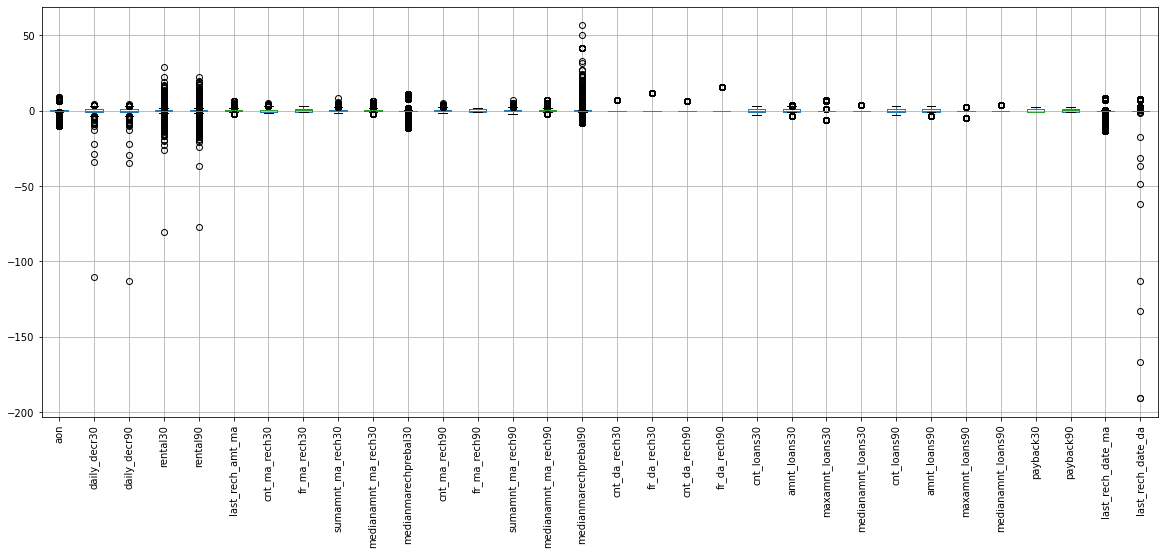

In [25]:
#check for outliers
micro[numeric].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.5)
plt.xticks(rotation =90)
plt.show()


In [26]:
#removing outliers

from scipy.stats import zscore

z=np.abs(zscore(micro[numeric]))
threshould =7
np.where(z<7)
numeric_f = micro[numeric][(z<7).all(axis=1)]
print(micro[numeric].shape)
print(numeric_f)
numeric= numeric_f
print("After removing outlier shape of the dataset is:",numeric.shape)

(209593, 32)
             aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.177112      0.332156      0.299181 -0.580786 -0.568411   
1       0.036453      1.116021      1.045084  0.339736  0.148082   
2      -0.034659     -0.007508     -0.028203 -0.366965 -0.409047   
3      -0.199213     -1.031486     -1.022743 -0.603059 -0.597731   
4       0.114880     -0.682337     -0.680928 -0.310473 -0.364212   
...          ...           ...           ...       ...       ...   
209588 -0.097931     -0.680457     -0.679097 -0.313194 -0.366369   
209589  0.152333     -0.950215     -0.942830 -0.140654 -0.229845   
209590  0.134577      1.100455      1.033424  0.825400  1.022476   
209591  0.309101      1.136057      1.068381 -0.515607 -0.389820   
209592  0.277063      0.525021      0.487157 -0.492433 -0.472438   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0               0.083417      -0.275617      1.603299          -0.177906   
1               1.

In [27]:
#loss of data
percentage = ((209593 - 195963)/209593)*100
print(percentage)

6.503079778427715


### Percentage of loss of data is 6% 

In [28]:
micro.head(10)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
0,1,0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,UPW,20,7
1,2,1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,...,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,UPW,10,8
2,3,1,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,UPW,19,8
3,4,1,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,UPW,6,6
4,5,1,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,...,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,UPW,22,6
5,6,1,-0.020350,0.192866,0.164984,-0.529955,-0.535813,-0.025513,-0.074007,0.083417,...,-0.269051,0.300689,0.192260,-0.285611,-0.248272,1.486199,1.215290,UPW,2,7
6,7,1,-0.030264,0.303625,0.271500,-0.540754,-0.529833,0.136681,-0.074007,1.501277,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,UPW,5,7
7,8,1,0.056514,1.158326,1.301473,-0.366901,-0.066131,0.021231,1.859043,0.777177,...,-0.269051,1.180312,1.097886,-0.285611,-0.248272,1.200708,0.756873,UPW,5,8
8,9,1,0.183845,-0.790272,-0.786208,0.002143,-0.117225,-0.058426,-0.074007,0.083417,...,-0.269051,0.624777,0.503740,-0.285611,-0.248272,0.724865,0.518615,UPW,15,6
9,10,1,-0.034217,-0.985402,-0.977399,-0.452214,-0.476881,0.117362,-0.074007,-0.429509,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,UPW,8,6


In [29]:
micro.tail(10)

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
209583,209584,1,0.111204,-1.071955,-1.062631,-0.610273,-0.603556,0.021231,-0.074007,0.087772,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,UPW,2,6
209584,209585,0,0.114269,-1.340075,-1.329038,-0.635113,-0.623672,-0.107221,-0.074007,-2.115772,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,UPW,6,6
209585,209586,1,0.065163,0.619182,0.572568,-0.457789,-0.470254,-0.025513,-0.074007,0.449550,...,-0.269051,0.859101,0.742755,-0.285611,-0.248272,1.123846,0.942651,UPW,4,7
209586,209587,1,-0.189733,1.476411,1.392031,0.411767,0.410631,-0.025513,-0.074007,0.083417,...,-0.269051,1.759898,2.156675,2.325828,-0.248272,0.799201,0.449831,UPW,22,7
209587,209588,1,-0.200701,1.247412,1.170880,2.255706,2.199093,0.083321,-0.074007,0.777177,...,3.716814,0.300689,0.503740,2.325828,4.027852,-0.937405,1.796344,UPW,2,8
209588,209589,1,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,UPW,17,6
209589,209590,1,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,...,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305,UPW,12,6
209590,209591,1,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,...,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939,UPW,29,7
209591,209592,1,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,...,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831,UPW,25,7
209592,209593,1,0.277063,0.525021,0.487157,-0.492433,-0.472438,0.136681,-0.074007,1.870396,...,-0.269051,-0.186805,0.192260,2.325828,-0.248272,-0.937405,-1.018917,UPW,7,7


In [30]:
micro.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
micro['pcircle'] = le.fit_transform(micro['pcircle'])

In [32]:
micro.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
0,0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,0,20,7
1,1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,...,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,0,10,8
2,1,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,0,19,8
3,1,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,0,6,6
4,1,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,...,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,0,22,6


In [33]:
#Dividing target and feature variables
micro.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'day', 'month'],
      dtype='object')

In [34]:
x  =micro.drop(columns=['label'])

In [35]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,-0.074007,0.083417,-0.275617,1.603299,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,0,20,7
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,-0.074007,1.501277,-0.799355,-1.128949,...,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,0,10,8
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,-0.074007,0.083417,-0.799355,-1.128949,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,0,19,8
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.074007,-0.291052,-1.694157,-1.128949,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,0,6,6
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,-0.074007,0.449550,0.992270,0.188872,...,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,0,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.679097,-0.313194,-0.366369,-0.058426,-0.074007,1.051183,0.096120,0.188872,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.094998,-0.098305,0,17,6
209589,0.152333,-0.950215,-0.942830,-0.140654,-0.229845,0.021231,-0.074007,-0.429509,0.384542,-0.239912,...,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.094998,-0.098305,0,12,6
209590,0.134577,1.100455,1.033424,0.825400,1.022476,0.000044,-0.074007,0.083417,0.620252,1.087596,...,-0.269051,1.038116,1.358455,2.325828,-0.248272,0.974292,0.752939,0,29,7
209591,0.309101,1.136057,1.068381,-0.515607,-0.389820,-0.025513,1.677239,-0.429509,0.620252,0.649604,...,-0.269051,0.300689,0.503740,2.325828,-0.248272,-0.937405,1.337831,0,25,7


In [36]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [37]:
#data transformation
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.53710497, 0.96613754, 0.96666734, ..., 0.        , 0.63333333,
        0.5       ],
       [0.54823522, 0.97296793, 0.9730118 , ..., 0.        , 0.3       ,
        1.        ],
       [0.54452911, 0.9631778 , 0.9638827 , ..., 0.        , 0.6       ,
        1.        ],
       ...,
       [0.5533491 , 0.97283229, 0.97291262, ..., 0.        , 0.93333333,
        0.5       ],
       [0.56244472, 0.97314251, 0.97320996, ..., 0.        , 0.8       ,
        0.5       ],
       [0.56077498, 0.96781812, 0.96826621, ..., 0.        , 0.2       ,
        0.5       ]])

In [38]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [39]:
#training the data
from sklearn.model_selection import train_test_split

x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2)
x_train

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day,month
21809,-0.113692,0.647944,0.600905,-0.412481,-0.430600,-0.025513,-0.074007,0.083417,0.992270,0.188872,...,-0.269051,1.296595,1.236859,-0.285611,-0.248272,0.974292,1.192852,0,9,7
149708,-0.046342,-0.627064,-0.627129,-0.289330,-0.347451,-0.025513,-0.074007,-0.432065,2.111545,-0.239912,...,-0.269051,0.859101,0.742755,-0.285611,-0.248272,0.234425,0.033823,0,30,6
53497,-0.232320,-0.981117,-0.973186,-0.613528,-0.606186,0.000044,-0.074007,0.083417,0.096120,1.217735,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.959798,1.995984,0,22,6
75056,-0.258857,0.733849,0.685907,-0.087585,-0.147142,-0.058426,-0.074007,0.777177,1.620370,0.188872,...,-0.269051,1.928929,2.156675,-0.285611,-0.248272,0.917442,0.595292,0,13,7
150241,-0.056064,-0.902726,-0.896242,-0.584148,-0.582491,0.070105,-0.074007,-0.429509,1.144615,-1.128949,...,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,0.799201,0.595292,0,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177201,0.091382,0.670071,0.623719,0.529955,0.359905,0.106795,1.608722,-0.432065,0.819578,0.188872,...,-0.269051,0.300689,0.192260,-0.285611,-0.248272,0.799201,0.595292,0,20,7
79422,0.034981,-0.002909,-0.021348,-0.312249,-0.321962,-0.025513,-0.074007,-0.429509,0.384542,1.217735,...,-0.269051,0.300689,0.192260,-0.285611,-0.248272,1.372801,1.226090,0,5,7
192027,-0.305125,-1.085388,-1.075888,-0.473576,-0.493920,-0.107221,-0.074007,-2.115772,-1.694157,-1.128949,...,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,0,22,6
144849,0.163987,0.723725,0.843357,-0.456380,-0.087079,0.070105,-0.074007,-0.432065,0.384542,0.649604,...,3.716702,1.715554,1.805903,-0.285611,-0.248272,-0.937405,0.402105,0,1,8


In [40]:
# import library
from imblearn.under_sampling import NearMiss
from collections import Counter
ns = NearMiss(0.8)

# fit predictor and target variable
x_ns, y_ns = ns.fit_resample(x, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ns))

Original dataset shape Counter({1: 183431, 0: 26162})
Resample dataset shape Counter({1: 32702, 0: 26162})


In [41]:
#finding the best random state
from sklearn.linear_model import LogisticRegression

#metric
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_ns,y_ns,test_size =.20,random_state=i)
    LR = LogisticRegression()   
    LR.fit(x_train,y_train)
    predrs=LR.predict(x_test)
    acc = accuracy_score(y_test,predrs)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

#LogisticRegression
print ("\n LogisticRegression")
print("\n Accuracy LogisticRegression===>",accuracy_score(y_test,predrs))
print("\n Confusion_mat:",'\n',confusion_matrix(y_test,predrs))
print('\n')
report =classification_report(y_test,predrs)
print(report)


Best accuracy is: 0.6696678841416801 On Random state: 80

 LogisticRegression

 Accuracy LogisticRegression===> 0.6533593816359466

 Confusion_mat: 
 [[2310 2969]
 [1112 5382]]


              precision    recall  f1-score   support

           0       0.68      0.44      0.53      5279
           1       0.64      0.83      0.73      6494

    accuracy                           0.65     11773
   macro avg       0.66      0.63      0.63     11773
weighted avg       0.66      0.65      0.64     11773



In [42]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(LR,x_ns,y_ns,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.6233863109169919


In [43]:
#RandomForestClassifier()
x_train,x_test,y_train,y_test =train_test_split(x_ns,y_ns,test_size =.20,random_state=80)
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc = accuracy_score(y_test,predrf)

print ("\n RandomForestClassifier")
print("\n Accuracy RandomForestClassifier===>",accuracy_score(y_test,predrf))
print("\n Confusion_mat:",'\n',confusion_matrix(y_test,predrf))
print('\n')
report =classification_report(y_test,predrf)
print(report)


 RandomForestClassifier

 Accuracy RandomForestClassifier===> 0.8296950649791897

 Confusion_mat: 
 [[4174  977]
 [1028 5594]]


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      5151
           1       0.85      0.84      0.85      6622

    accuracy                           0.83     11773
   macro avg       0.83      0.83      0.83     11773
weighted avg       0.83      0.83      0.83     11773



In [44]:
crv = cross_val_score(rf,x_ns,y_ns,cv=10)
print("Cross validation score of RandomForestClassifier",crv.mean())

Cross validation score of RandomForestClassifier 0.7932387348754932


In [65]:
#Tunning the parameter using GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_ns,y_ns,train_size=.25,random_state=80)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:",'\n',rf_conf_mat)
print('\n')
report =classification_report(y_test,y_pred)
print(report)

best_params= > {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

 Accuracy RandomForest Normal===> 0.8123357796502673

 Confusion_mat: 
 [[15051  4575]
 [ 3710 20812]]


              precision    recall  f1-score   support

           0       0.80      0.77      0.78     19626
           1       0.82      0.85      0.83     24522

    accuracy                           0.81     44148
   macro avg       0.81      0.81      0.81     44148
weighted avg       0.81      0.81      0.81     44148



In [66]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_df=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_df)*100)
print('\n',confusion_matrix(y_test,pred_df))
print(classification_report(y_test,pred_df))

Accuracy 75.54136087704993

 [[14171  5455]
 [ 5343 19179]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     19626
           1       0.78      0.78      0.78     24522

    accuracy                           0.76     44148
   macro avg       0.75      0.75      0.75     44148
weighted avg       0.76      0.76      0.76     44148



In [68]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,x_ns,y_ns,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.7412188209235194


### From the above accuracy for the
### Logistic Regression is : 65.3 % and crossvalidation_score is: 62.3%
### RandomForestclassification is: 82% and crossvalidation_score is: 79.3% After tunning parameter accuracy score is :81.2% and crossvalidation score is: 79.3%
### DecisionTreeclassification is:75.5% and crossvalidation_score is:74.1%

### From all the above after tunning parameter the resultant accuracy_score and cross validation score are nearest to each other.so,im considering RandomForestClassifier shows the best result for my model. 

In [69]:
#AUC_ROC_CURve
pred_prob_LR = LR.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr_LR, tpr_LR, thresh_LR = roc_curve(y_test, pred_prob_LR[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_LR = roc_auc_score(y_test, pred_prob_LR[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])

print(auc_score_LR, auc_score_dt,auc_score_clf)

0.7186689073190063 0.7520831997801012 0.8967943654569801


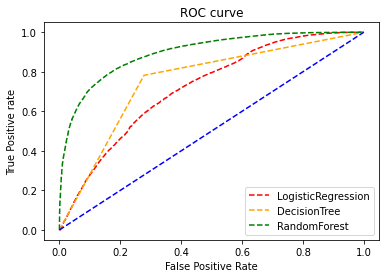

In [70]:
# plot roc curves
plt.plot(fpr_LR, tpr_LR, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [71]:
#saving the model
import joblib
joblib.dump(clf,"micro_credit.pkl")

['micro_credit.pkl']